In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model, metrics

In [3]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
X = df.drop(columns =['Outcome'])
Y = df.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=23)

### 1. Binomial Logistic regression: 

In [7]:
model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [9]:
acc = accuracy_score(Y_test, model.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 80.52%


### 2. Multinomial Logistic Regression

In [30]:
df = pd.read_csv("drug200.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [32]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

df[cat_col].nunique()

Categorical columns : ['Sex', 'BP', 'Cholesterol', 'Drug']
Numerical columns : ['Age', 'Na_to_K']


Sex            2
BP             3
Cholesterol    2
Drug           5
dtype: int64

In [33]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,DrugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,DrugY


In [34]:
X = df.drop(columns=["Drug"])
Y = df.Drug

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [35]:
model = linear_model.LogisticRegression(max_iter=10000, random_state=0)

model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [38]:
Y_pred = model.predict(X_test)
Y_pred

array(['drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'DrugY', 'drugX',
       'drugX', 'drugX', 'DrugY', 'drugB', 'drugX', 'drugX', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY',
       'DrugY', 'drugX', 'drugB', 'DrugY', 'drugX', 'drugA', 'DrugY',
       'drugB', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugA', 'drugA',
       'DrugY', 'drugA', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugB', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'DrugY'], dtype=object)

In [41]:
acc = metrics.accuracy_score(Y_test, Y_pred) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 87.50%


### How to Evaluate Logistic Regression Model?

Evaluating the logistic regression model helps assess its performance and ensure it generalizes well to new, unseen data. The following metrics are commonly used:

1. Accuracy: provides the proportion of correctly classified instances.
$$
Accuracy = \frac{True Positives + True Negatives}{Total}
$$

2. Precision: focuses on the accuracy of positive predictions.
$$
Precision = \frac{True Postives}{True Positives + False Positives}
$$

3. Recall (Sensitivity or True Positive Rate): measures the proportion of correctly predicted positive instances among all actual positive instances.
$$
Recall = \frac{True Positives}{True Positives + False Negatives}
$$

4. F1 Score: is the harmonic mean of precision and recall.
$$
F1 Score = 2 * \frac{Precision * Recall}{Precision + Recall}
$$

5. Area Under the Receiver Operating Characteristic Curve (AUC-ROC): The ROC curve plots the true positive rate against the false positive rate at various thresholds. AUC-ROC measures the area under this curve which provides an aggregate measure of a model's performance across different classification thresholds.

6. Area Under the Precision-Recall Curve (AUC-PR): Similar to AUC-ROC, AUC-PR measures the area under the precision-recall curve helps in providing a summary of a model's performance across different precision-recall trade-offs.

| Actual Value | Predicted Value | Result Type               |
| ------------ | --------------- | ------------------------- |
| 1            | 1               | ✅ **True Positive (TP)**  |
| 0            | 0               | ✅ **True Negative (TN)**  |
| 0            | 1               | ❌ **False Positive (FP)** |
| 1            | 0               | ❌ **False Negative (FN)** |


In [48]:
# Doing Binary Logistic Regression
# Load the dataset
df = pd.read_csv('diabetes.csv')
X = df.drop(columns =['Outcome'])
Y = df.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=23)

model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [49]:
Y_prob = model.predict_proba(X_test)
Y_prob

array([[0.67532847, 0.32467153],
       [0.04004763, 0.95995237],
       [0.20453235, 0.79546765],
       [0.66386922, 0.33613078],
       [0.91244444, 0.08755556],
       [0.34070257, 0.65929743],
       [0.22496089, 0.77503911],
       [0.75801679, 0.24198321],
       [0.72611929, 0.27388071],
       [0.05756838, 0.94243162],
       [0.72654689, 0.27345311],
       [0.81895943, 0.18104057],
       [0.31854019, 0.68145981],
       [0.03536821, 0.96463179],
       [0.87469795, 0.12530205],
       [0.15477691, 0.84522309],
       [0.95203995, 0.04796005],
       [0.94846088, 0.05153912],
       [0.85650964, 0.14349036],
       [0.66476914, 0.33523086],
       [0.86200243, 0.13799757],
       [0.72304693, 0.27695307],
       [0.74111814, 0.25888186],
       [0.67670226, 0.32329774],
       [0.24730239, 0.75269761],
       [0.78131131, 0.21868869],
       [0.93509058, 0.06490942],
       [0.96878326, 0.03121674],
       [0.87697923, 0.12302077],
       [0.52676204, 0.47323796],
       [0.

In [50]:
print(model.classes_)

[0 1]


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

In [58]:
# 🔹 Accuracy
acc = accuracy_score(Y_test, Y_pred)

# 🔹 Precision
prec = precision_score(Y_test, Y_pred)

# 🔹 Recall
rec = recall_score(Y_test, Y_pred)

# 🔹 F1 Score
f1 = f1_score(Y_test, Y_pred)

# 🔹 ROC AUC Score
Y_prob_class1 = Y_prob[:, 1]
roc_auc = roc_auc_score(Y_test, Y_prob_class1)

# 🔹 AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_prob_class1)
auc_pr = auc(recall_curve, precision_curve)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")
print(f"AUC-PR: {auc_pr:.3f}")

Accuracy: 0.805
Precision: 0.756
Recall: 0.642
F1 Score: 0.694
AUC-ROC: 0.857
AUC-PR: 0.720


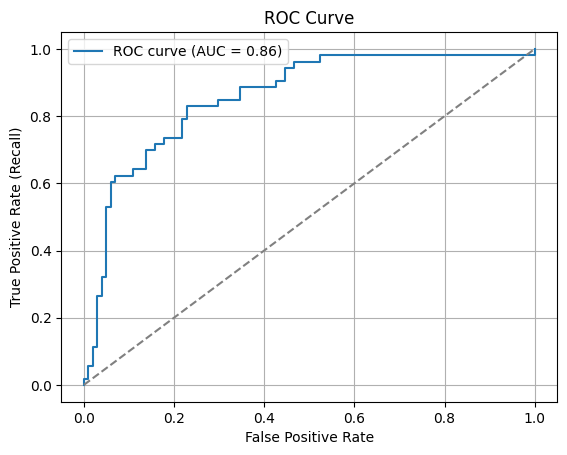

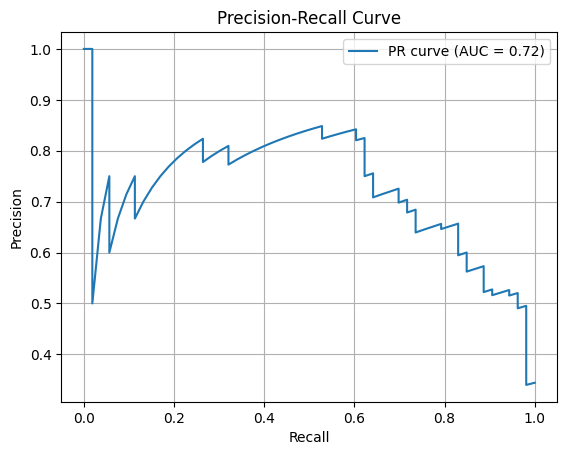

In [62]:
# 🔹 Plot ROC Curve (optional)
fpr, tpr, _ = roc_curve(Y_test, Y_prob_class1)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Plot Precision-Recall Curve (optional)
plt.figure()
plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

### Home Task

Q: What all the Evaluation metrics value and plots conclude?